## Small Project 
### Digit Recognizer : Simple MNIST Neural Network from Scratch (numpy, no TF/Keras)

> Forward Propagation 

$$
Z^{[1]} = W^{[1]}X + b^{[1]}
$$

$$
A^{[1]} = g_{\text{ReLU}}(Z^{[1]})
$$

$$
Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}
$$

$$
A^{[2]} = g_{\text{softmax}}(Z^{[2]})
$$


> Backward Propagation 

$$
dZ^{[2]} = A^{[2]} - Y
$$

$$
dW^{[2]} = \frac{1}{m}dZ^{[2]}A^{[1]T}
$$

$$
dB^{[2]} = \frac{1}{m} \sum dZ^{[2]}
$$

$$
dZ^{[1]} = W^{[2]T}dZ^{[2]} \cdot g_{[1]}'(Z^{[1]})
$$

$$
dW^{[1]} = \frac{1}{m}dZ^{[1]}X^{T}
$$

$$
dB^{[1]} = \frac{1}{m} \sum dZ^{[1]}
$$

> Parameter Updates 

$$
W^{[2]} := W^{[2]} - \alpha dW^{[2]}
$$

$$
b^{[2]} := b^{[2]} - \alpha dB^{[2]}
$$

$$
W^{[1]} := W^{[1]} - \alpha dW^{[1]}
$$

$$
b^{[1]} := b^{[1]} - \alpha dB^{[1]}
$$

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from config_matplotlib import configurer_style_matplotlib
configurer_style_matplotlib()

In [2]:
data = pd.read_csv('/Users/johanghre/Documents/MACHINE LEARNING - DATA SCIENCE - AI /FORMATION DEEP LEARNING YOUTUBE/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape

# shuffle before splitting into dev and training sets
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [54]:
print(X_train[:, 0].shape)

(784,)


In [11]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size 

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iterations :", i)
            print("Accuracy :", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations=500, alpha=0.1)

Iterations : 0
[5 2 4 ... 6 8 9] [8 5 6 ... 1 9 0]
Accuracy : 0.09697560975609756
Iterations : 10
[5 2 4 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.1646829268292683
Iterations : 20
[5 4 4 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.275219512195122
Iterations : 30
[5 4 4 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.35092682926829266
Iterations : 40
[5 4 6 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.41697560975609754
Iterations : 50
[8 4 6 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.4875121951219512
Iterations : 60
[8 4 6 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.546219512195122
Iterations : 70
[8 4 6 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.5907317073170731
Iterations : 80
[8 4 6 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.6235609756097561
Iterations : 90
[8 4 6 ... 7 1 9] [8 5 6 ... 1 9 0]
Accuracy : 0.6513658536585366
Iterations : 100
[8 4 6 ... 7 7 9] [8 5 6 ... 1 9 0]
Accuracy : 0.6733658536585366
Iterations : 110
[8 4 6 ... 7 7 9] [8 5 6 ... 1 9 0]
Accuracy : 0.692390243902439
Iterations : 12

In [43]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions 
    
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    
    current_image = current_image.reshape((28, 28)) * 255 
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.title(f"Label: {int(label)}")
    plt.gray()
    plt.suptitle(f"Prediction: {int(prediction)}")
    plt.show()

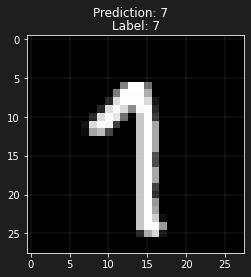

In [46]:
test_prediction(, W1, b1, W2, b2)